# Frequentist statistics and MLE

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Let us understand the Maximum Likelihood Estimation (MLE) with an example

Let us consider a random variable X that follows a normal distribution with mean $\mu$ and variance $\sigma^2$


In [2]:
# Let us draw a sample of 1000 observations from the normal distribution with mean 0 and variance 1
n_samples = 1000
true_mu = 0
true_sigma2 = 1
x_samples = stats.norm.rvs(
    loc=true_mu,
    scale=np.sqrt(true_sigma2),
    size=n_samples
)

In [3]:
# Let us calculate the Maximum Likelihood Estimation (MLE) of the mean and variance of the normal distribution
mu_mle = np.mean(x_samples)
sigma2_mle = np.var(x_samples)

In [4]:
# Let us use scipy stats' fit function, to estimate the mean and variance of the normal distribution fitting the data
mu_mle_scipy = stats.norm.fit(x_samples)[0]
sigma2_mle_scipy = stats.norm.fit(x_samples)[1]

In [5]:
# Compare the MLE of the mean and variance calculated by us and scipy, via MSE
print('Our MLE of the mean:', mu_mle)
print('Scipy MLE of the mean:', mu_mle_scipy)
print('Our MLE of the variance:', sigma2_mle)
print('Scipy MLE of the variance:', sigma2_mle_scipy)
print('MSE of the MLE of the mean:', np.mean((mu_mle - mu_mle_scipy)**2))
print('MSE of the MLE of the variance:', np.mean((sigma2_mle - sigma2_mle_scipy)**2))

Our MLE of the mean: 0.010380117644433412
Scipy MLE of the mean: 0.010380117644433412
Our MLE of the variance: 1.0080814224419277
Scipy MLE of the variance: 1.0040325803687487
MSE of the MLE of the mean: 0.0
MSE of the MLE of the variance: 1.6393122133544547e-05


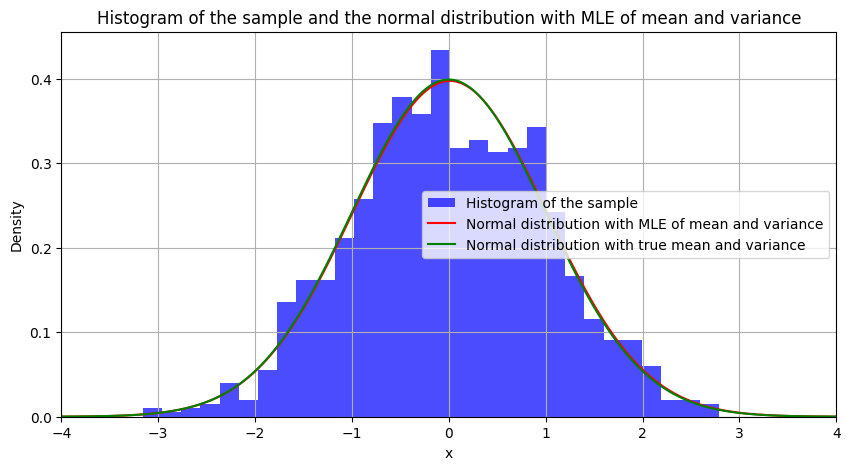

In [6]:
# Let us plot the histogram of the samples
plt.figure(figsize=(10, 5))
# Histogram of the sample
plt.hist(
    x_samples,
    bins=30,
    density=True,
    color='b',
    alpha=0.7,
    label='Histogram of the sample'
)
# Normal distribution with the MLE of the mean and variance
x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(
    x,
    loc=mu_mle,
    scale=np.sqrt(sigma2_mle)
)
plt.plot(
    x,
    pdf,
    color='r',
    label='Normal distribution with MLE of mean and variance'
)
# Normal distribution with the true mean and variance
pdf = stats.norm.pdf(
    x,
    loc=0,
    scale=1
)
plt.plot(
    x,
    pdf,
    color='g',
    label='Normal distribution with true mean and variance'
)
plt.xlim(-4, 4)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of the sample and the normal distribution with MLE of mean and variance')
plt.legend()
plt.grid()
plt.show()

### Evaluate how increasing the number of samples affects the MLE of the mean and variance

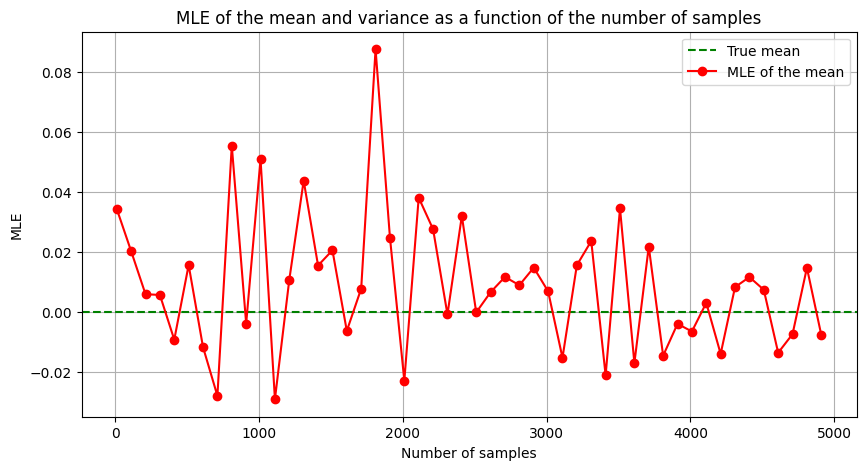

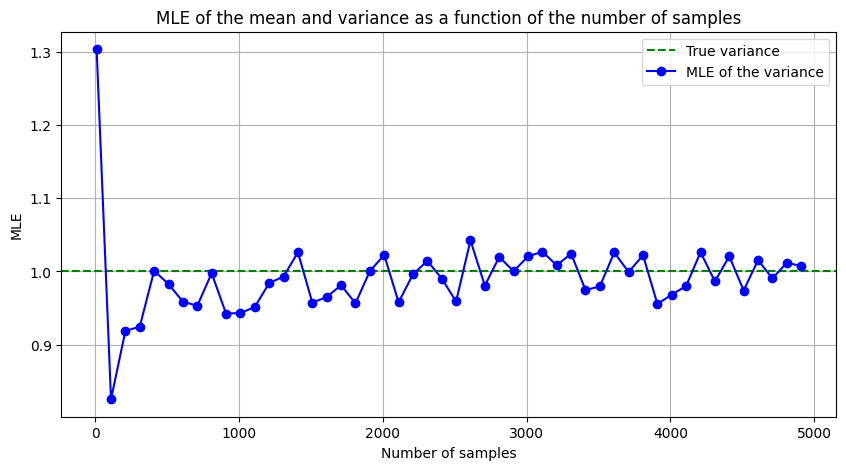

In [7]:
# Evaluate how increasing the number of samples affects the MLE of the mean and variance
n_samples = np.arange(10, 5000, 100)
mu_mle = []
sigma2_mle = []
for n in n_samples:
    x_samples = stats.norm.rvs(
        loc=0,
        scale=1,
        size=n
    )
    mu_mle.append(np.mean(x_samples))
    sigma2_mle.append(np.var(x_samples))

# Plot the MLE of the mean, as a function of the number of samples
plt.figure(figsize=(10, 5))
# True mean
plt.axhline(y=0, color='g', linestyle='--', label='True mean')
plt.plot(n_samples, mu_mle, marker='o', color='r', label='MLE of the mean')
plt.xlabel('Number of samples')
plt.ylabel('MLE')
plt.title('MLE of the mean and variance as a function of the number of samples')
plt.legend()
plt.grid()
plt.show()

# Plot the MLE of the variance as a function of the number of samples
plt.figure(figsize=(10, 5))
# True variance
plt.axhline(y=1, color='g', linestyle='--', label='True variance')
plt.plot(n_samples, sigma2_mle, marker='o', color='b', label='MLE of the variance')
plt.xlabel('Number of samples')
plt.ylabel('MLE')
plt.title('MLE of the mean and variance as a function of the number of samples')
plt.legend()
plt.grid()
plt.show()